# JGG Field Map

In [1]:
import datetime
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.gridspec as gridspec
import uproot
import math
from glob import glob
%matplotlib inline

%load_ext autoreload
%autoreload 2

prop_cycle = plt.rcParams['axes.prop_cycle']
_colors = prop_cycle.by_key()['color']

_save_dir = 'plots/'

In [2]:
file = 'maps_from_jon/JGGfieldext9.dat'

In [3]:
df = pd.read_csv(file, sep=' ', header=6, index_col=False,
                 names=['Bx', 'By', 'Bz'],
                 dtype={'Bx': np.float64, 'By': np.float64, 'Bz': np.float64},
                 skiprows=lambda x: x == 118480, # drop last line as it contains "all done..."
                )

/var/folders/qg/0ky0tq4s6tvgxvnksxdvqjhr0000j6/T/ipykernel_64512/1149126021.py:1: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df = pd.read_csv(file, sep=' ', header=6, index_col=False,


In [4]:
df.head()

,Bx,By,Bz
0,-0.00734,0.00277,-0.00632
1,-0.00833,0.00279,-0.00686
2,-0.00932,0.00280,-0.00741
3,-0.01075,0.00271,-0.00803
4,-0.01225,0.00260,-0.00866


Details of map
```
grid size, grid min, grid spacing, nominal field value:
51 23 101
-25 -11 -40
50.8 50.8 50.8
0.75000
```
Units are mm
grid is 2'' = 50.8 mm per grid point, the zero is the center of the JGG

In [5]:
b = np.sqrt(df['Bx'] **2 + df['By'] **2 + df['Bz'] **2)
df['B'] = b

In [6]:
bins_x = np.linspace(start=-25*50.8, stop=25*50.8, num=51)
bins_y = np.linspace(start=-11*50.8, stop=11*50.8, num=23)
bins_z = np.linspace(start=-40*50.8, stop=40*50.8, num=101)

In [7]:
bins_x = np.linspace(start=-25, stop=25, num=51)
bins_y = np.linspace(start=-11, stop=11, num=23)
bins_z = np.linspace(start=-40, stop=60, num=101)
x_ = []
y_ = []
z_ = []

for x in bins_x:
    for y in bins_y:
        for z in bins_z:
            x_.append(x)
            y_.append(y)
            z_.append(z)

df['x'] = x_
df['y'] = y_
df['z'] = z_
df.head()

,Bx,By,Bz,B,x,y,z
0,-0.00734,0.00277,-0.00632,0.010074,-25.0,-11.0,-40.0
1,-0.00833,0.00279,-0.00686,0.011146,-25.0,-11.0,-39.0
2,-0.00932,0.00280,-0.00741,0.012232,-25.0,-11.0,-38.0
3,-0.01075,0.00271,-0.00803,0.013689,-25.0,-11.0,-37.0
4,-0.01225,0.00260,-0.00866,0.015226,-25.0,-11.0,-36.0


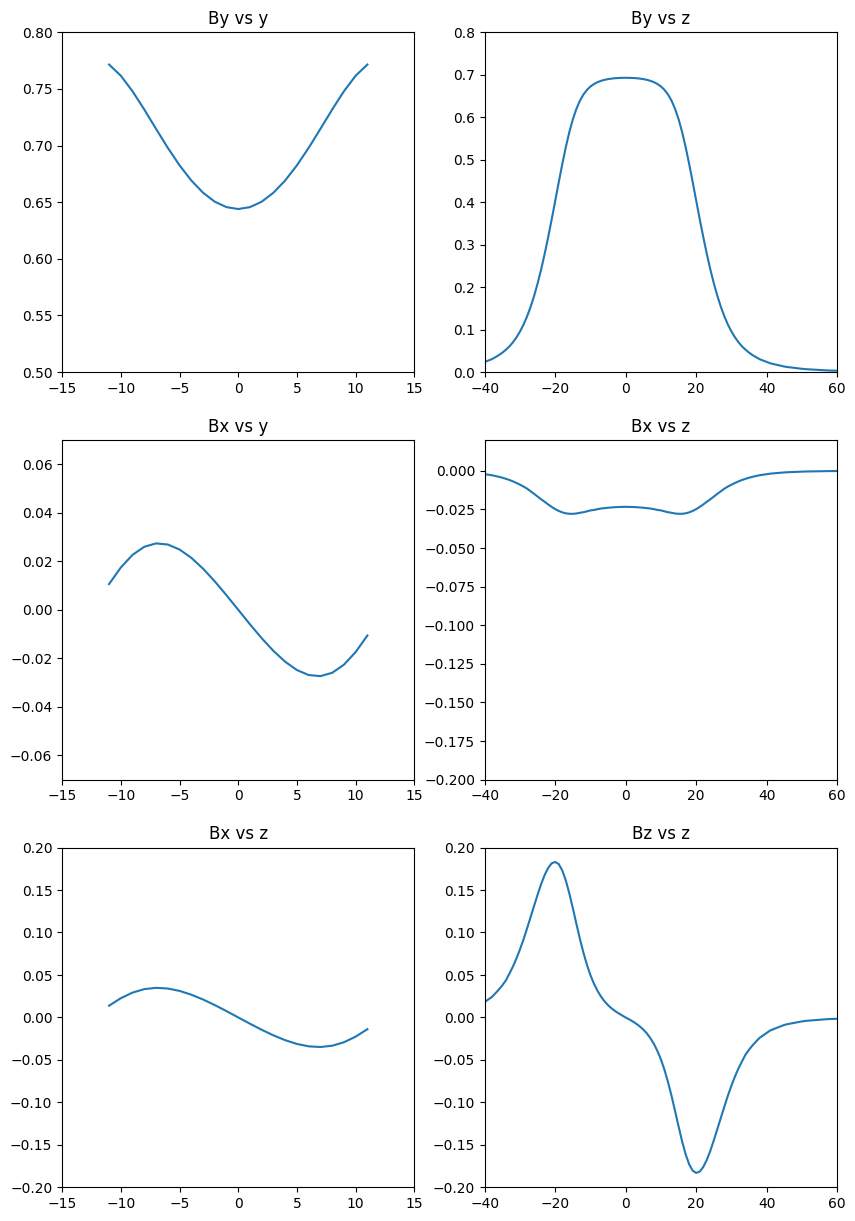

In [8]:
fig, ax = plt.subplots(ncols=2, nrows=3, figsize=(10, 15))

df_sel = df.query('x == 5 and z == 8')
ax[0][0].plot(df_sel['y'], df_sel['By'])
ax[0][0].set_xlim([-15,15])
ax[0][0].set_ylim([0.5,0.8])
ax[0][0].set_ylim([0.5,0.8])
ax[0][0].set_title('By vs y',fontsize=12)
# ax[0][0].set_ylabel('Waveform [mV]',fontsize=18)

df_sel = df.query('x == 5 and y == 5')
ax[0][1].plot(df_sel['z'], df_sel['By'])
ax[0][1].set_xlim([-40,60])
ax[0][1].set_ylim([0.,0.8])
ax[0][1].set_title('By vs z',fontsize=12)

df_sel = df.query('x == 5 and z == 8')
ax[1][0].plot(df_sel['y'], df_sel['Bx'])
ax[1][0].set_xlim([-15,15])
ax[1][0].set_ylim([-0.07,0.07])
ax[1][0].set_title('Bx vs y',fontsize=12)

df_sel = df.query('x == 5 and y == 5')
ax[1][1].plot(df_sel['z'], df_sel['Bx'])
ax[1][1].set_xlim([-40,60])
ax[1][1].set_ylim([-0.2,0.02])
ax[1][1].set_title('Bx vs z',fontsize=12)

df_sel = df.query('x == 5 and z == 8')
ax[2][0].plot(df_sel['y'], df_sel['Bz'])
ax[2][0].set_xlim([-15,15])
ax[2][0].set_ylim([-0.2,0.2])
ax[2][0].set_title('Bx vs z',fontsize=12)

df_sel = df.query('x == 5 and y == 5')
ax[2][1].plot(df_sel['z'], df_sel['Bz'])
ax[2][1].set_xlim([-40,60])
ax[2][1].set_ylim([-0.2,0.2])
ax[2][1].set_title('Bz vs z',fontsize=12)

plt.show()


## Convert to mm

In [9]:
scale = 50.8

In [10]:
bins_x = np.linspace(start=-25*scale, stop=25*scale, num=51)
bins_y = np.linspace(start=-11*scale, stop=11*scale, num=23)
bins_z = np.linspace(start=-40*scale, stop=60*scale, num=101)
x_ = []
y_ = []
z_ = []

for x in bins_x:
    for y in bins_y:
        for z in bins_z:
            x_.append(round(x, 1))
            y_.append(round(y, 1))
            z_.append(round(z, 1))

df['x'] = x_
df['y'] = y_
df['z'] = z_
df.head()

,Bx,By,Bz,B,x,y,z
0,-0.00734,0.00277,-0.00632,0.010074,-1270.0,-558.8,-2032.0
1,-0.00833,0.00279,-0.00686,0.011146,-1270.0,-558.8,-1981.2
2,-0.00932,0.00280,-0.00741,0.012232,-1270.0,-558.8,-1930.4
3,-0.01075,0.00271,-0.00803,0.013689,-1270.0,-558.8,-1879.6
4,-0.01225,0.00260,-0.00866,0.015226,-1270.0,-558.8,-1828.8


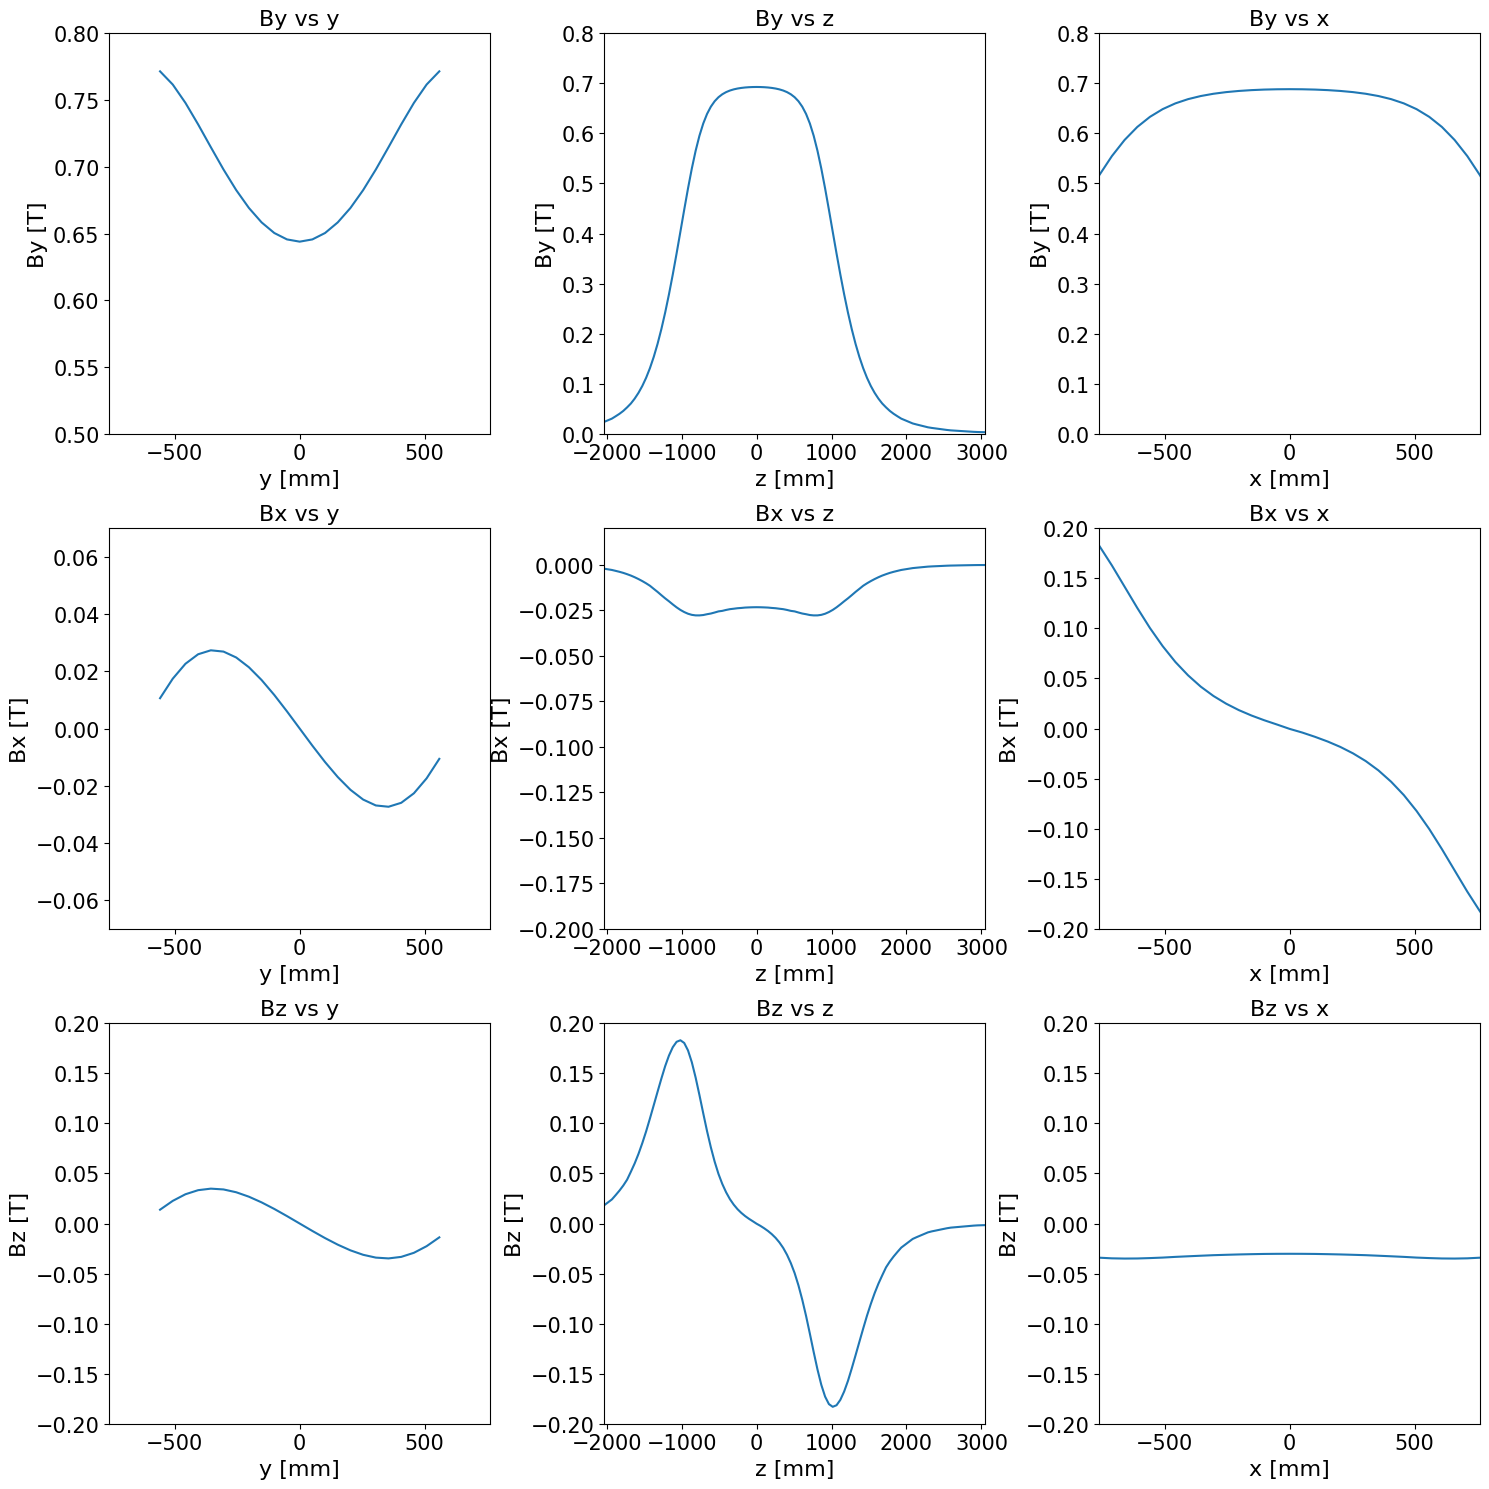

In [11]:
fig, ax = plt.subplots(ncols=3, nrows=3, figsize=(15, 15))

font_size = 16

df_sel = df.query('x == 5*@scale and z == 8*@scale')
ax[0][0].plot(df_sel['y'], df_sel['By'])
ax[0][0].set_xlim([-15*scale,15*scale])
ax[0][0].set_ylim([0.5,0.8])
ax[0][0].set_title('By vs y',fontsize=font_size)
ax[0][0].set_xlabel('y [mm]',fontsize=font_size)
ax[0][0].set_ylabel('By [T]',fontsize=font_size)

df_sel = df.query('x == 5*@scale and y == 5*@scale')
ax[0][1].plot(df_sel['z'], df_sel['By'])
ax[0][1].set_xlim([-40*scale,60*scale])
ax[0][1].set_ylim([0.,0.8])
ax[0][1].set_title('By vs z',fontsize=font_size)
ax[0][1].set_xlabel('z [mm]',fontsize=font_size)
ax[0][1].set_ylabel('By [T]',fontsize=font_size)

df_sel = df.query('z == 8*@scale and y == 5*@scale')
ax[0][2].plot(df_sel['x'], df_sel['By'])
ax[0][2].set_xlim([-15*scale,15*scale])
ax[0][2].set_ylim([0.,0.8])
ax[0][2].set_title('By vs x',fontsize=font_size)
ax[0][2].set_xlabel('x [mm]',fontsize=font_size)
ax[0][2].set_ylabel('By [T]',fontsize=font_size)

df_sel = df.query('x == 5*@scale and z == 8*@scale')
ax[1][0].plot(df_sel['y'], df_sel['Bx'])
ax[1][0].set_xlim([-15*scale,15*scale])
ax[1][0].set_ylim([-0.07,0.07])
ax[1][0].set_title('Bx vs y',fontsize=font_size)
ax[1][0].set_xlabel('y [mm]',fontsize=font_size)
ax[1][0].set_ylabel('Bx [T]',fontsize=font_size)

df_sel = df.query('x == 5*@scale and y == 5*@scale')
ax[1][1].plot(df_sel['z'], df_sel['Bx'])
ax[1][1].set_xlim([-40*scale,60*scale])
ax[1][1].set_ylim([-0.2,0.02])
ax[1][1].set_title('Bx vs z',fontsize=font_size)
ax[1][1].set_xlabel('z [mm]',fontsize=font_size)
ax[1][1].set_ylabel('Bx [T]',fontsize=font_size)

df_sel = df.query('z == 8*@scale and y == 5*@scale')
ax[1][2].plot(df_sel['x'], df_sel['Bx'])
ax[1][2].set_xlim([-15*scale,15*scale])
ax[1][2].set_ylim([-0.2,0.2])
ax[1][2].set_title('Bx vs x',fontsize=font_size)
ax[1][2].set_xlabel('x [mm]',fontsize=font_size)
ax[1][2].set_ylabel('Bx [T]',fontsize=font_size)

df_sel = df.query('x == 5*@scale and z == 8*@scale')
ax[2][0].plot(df_sel['y'], df_sel['Bz'])
ax[2][0].set_xlim([-15*scale,15*scale])
ax[2][0].set_ylim([-0.2,0.2])
ax[2][0].set_title('Bz vs y',fontsize=font_size)
ax[2][0].set_xlabel('y [mm]',fontsize=font_size)
ax[2][0].set_ylabel('Bz [T]',fontsize=font_size)

df_sel = df.query('x == 5*@scale and y == 5*@scale')
ax[2][1].plot(df_sel['z'], df_sel['Bz'])
ax[2][1].set_xlim([-40*scale,60*scale])
ax[2][1].set_ylim([-0.2,0.2])
ax[2][1].set_title('Bz vs z',fontsize=font_size)
ax[2][1].set_xlabel('z [mm]',fontsize=font_size)
ax[2][1].set_ylabel('Bz [T]',fontsize=font_size)

df_sel = df.query('z == 8*@scale and y == 5*@scale')
ax[2][2].plot(df_sel['x'], df_sel['Bz'])
ax[2][2].set_xlim([-15*scale,15*scale])
ax[2][2].set_ylim([-0.2,0.2])
ax[2][2].set_title('Bz vs x',fontsize=font_size)
ax[2][2].set_xlabel('x [mm]',fontsize=font_size)
ax[2][2].set_ylabel('Bz [T]',fontsize=font_size)

for axes in ax:
    for a in axes:
        a.tick_params(labelsize=15)
plt.tight_layout()
plt.savefig(_save_dir + 'fieldmap_1d.pdf')
plt.show()


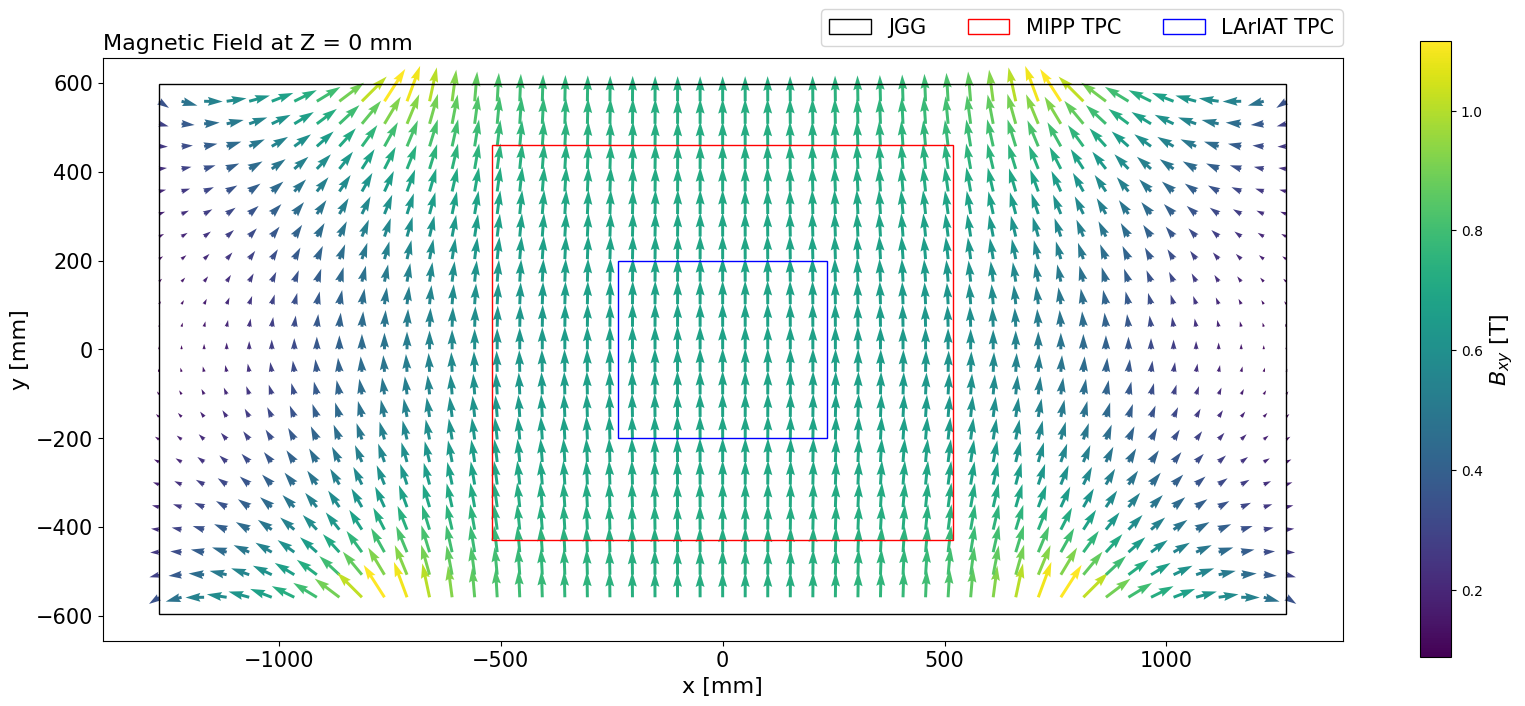

In [12]:
df_sel = df.query('z == 0')

x = df_sel['x']
y = df_sel['y']
bx = df_sel['Bx']
by = df_sel['By']
M = np.hypot(bx, by)

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(20, 8))

q = ax.quiver(x, y, bx, by, M)
cbar = fig.colorbar(q)

# ax.quiverkey(q, X=0.9, Y=1.02, U=1,
#              label='B-field', labelpos='E')

r0 = patches.Rectangle((-2540/2, -1194/2), 2540, 1194, 
                       linewidth=1, edgecolor='black', facecolor='none', label='JGG')
ax.add_patch(r0)
r1 = patches.Rectangle((-520, -430), 520*2, 430+460, 
                       linewidth=1, edgecolor='r', facecolor='none', label='MIPP TPC')
ax.add_patch(r1)
r2 = patches.Rectangle((-470/2, -400/2), 470, 400, 
                       linewidth=1, edgecolor='b', facecolor='none', label='LArIAT TPC')
ax.add_patch(r2)

cbar.ax.set_ylabel('$B_{xy}$ [T]', fontsize=16)
ax.set_title(f'Magnetic Field at Z = 0 mm',fontsize=16, loc='left')
ax.set_xlabel('x [mm]',fontsize=16)
ax.set_ylabel('y [mm]',fontsize=16)
ax.legend(bbox_to_anchor=(0, 1.02, 1, 0.2), loc="lower right", borderaxespad=0, ncol=3, fontsize=15)
ax.tick_params(labelsize=15)
plt.gca().set_aspect('equal')

plt.savefig(_save_dir + 'fieldmap_arrow_yx.pdf')
plt.show()

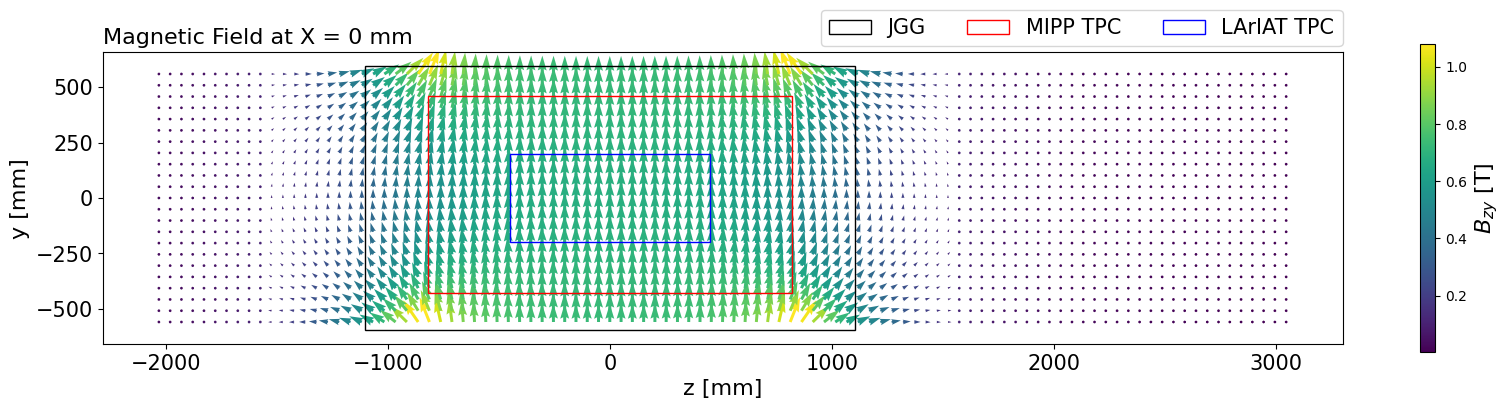

In [13]:
df_sel = df.query('x == 0')

z = df_sel['z']
y = df_sel['y']
bz = df_sel['Bz']
by = df_sel['By']
M = np.hypot(bz, by)

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(20, 4))

q = ax.quiver(z, y, bz, by, M, scale=50) # width=0.001
cbar = fig.colorbar(q)

# ax.quiverkey(q, X=0.9, Y=1.02, U=1,
#              label='B-field', labelpos='E')

r0 = patches.Rectangle((-2209/2, -1194/2), 2209, 1194, 
                       linewidth=1, edgecolor='black', facecolor='none', label='JGG')
ax.add_patch(r0)
r1 = patches.Rectangle((-820, -430), 820*2, 430+460, 
                       linewidth=1, edgecolor='r', facecolor='none', label='MIPP TPC')
ax.add_patch(r1)
r2 = patches.Rectangle((-900/2, -400/2), 900, 400, 
                       linewidth=1, edgecolor='b', facecolor='none', label='LArIAT TPC')
ax.add_patch(r2)

cbar.ax.set_ylabel('$B_{zy}$ [T]', fontsize=16)
ax.set_title(f'Magnetic Field at X = 0 mm',fontsize=16, loc='left')
ax.set_xlabel('z [mm]',fontsize=16)
ax.set_ylabel('y [mm]',fontsize=16)
ax.legend(bbox_to_anchor=(0, 1.02, 1, 0.2), loc="lower right", borderaxespad=0, ncol=3, fontsize=15)
ax.tick_params(labelsize=15)
plt.gca().set_aspect('equal')

plt.savefig(_save_dir + 'fieldmap_arrow_yz.pdf')
plt.show()

## Save to file for G4Beamline

In [14]:
X0 = np.min(df['x'])
Y0 = np.min(df['y'])
Z0 = np.min(df['z'])

grid_str = f'grid X0={X0} Y0={Y0} Z0={Z0} nX=51 nY=23 nZ=101 dX=50.8 dY=50.8 dZ=50.8\n'
print(grid_str)

grid X0=-1270.0 Y0=-558.8 Z0=-2032.0 nX=51 nY=23 nZ=101 dX=50.8 dY=50.8 dZ=50.8



In [15]:
f = open('jgg_field_map.txt', 'w')
f.write(grid_str)
f.write('data\n')
df.to_csv(f, sep=' ', index=False, header=False,
          columns=['x', 'y', 'z', 'Bx', 'By', 'Bz'])
f.close()